In [1]:
 # Only use this line to show in jupyter
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils

Using Theano backend.


In [3]:
batch_size = 32
nb_classes = 10
nb_epoch = 50
data_augmentation = True

In [4]:
# input image dimensions
img_rows, img_cols = 32, 32
# the CIFAR10 images are RGB
img_channels = 3

In [5]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
print(X_train[0])

[[[ 59  43  50 ..., 158 152 148]
  [ 16   0  18 ..., 123 119 122]
  [ 25  16  49 ..., 118 120 109]
  ..., 
  [208 201 198 ..., 160  56  53]
  [180 173 186 ..., 184  97  83]
  [177 168 179 ..., 216 151 123]]

 [[ 62  46  48 ..., 132 125 124]
  [ 20   0   8 ...,  88  83  87]
  [ 24   7  27 ...,  84  84  73]
  ..., 
  [170 153 161 ..., 133  31  34]
  [139 123 144 ..., 148  62  53]
  [144 129 142 ..., 184 118  92]]

 [[ 63  45  43 ..., 108 102 103]
  [ 20   0   0 ...,  55  50  57]
  [ 21   0   8 ...,  50  50  42]
  ..., 
  [ 96  34  26 ...,  70   7  20]
  [ 96  42  30 ...,  94  34  34]
  [116  94  87 ..., 140  84  72]]]


frog
(3, 32, 32)


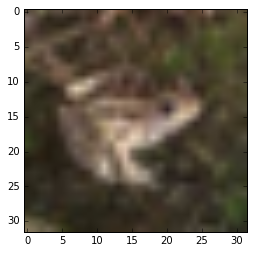

In [7]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
id =22
image = X_train[id]
print(labels[int(y_train[id])])
print(image.shape)
image = np.transpose(image, (1,2,0))
plt.imshow(image ,interpolation='bilinear')


In [8]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


In [9]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [10]:
print(Y_train[0])

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


In [11]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=(img_channels, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# let's train the model using SGD + momentum (how original).
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [12]:
# Lets explore the model
# http://keras.io/models/about-keras-models/
print(model.summary()) #  summary representation of your model

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
convolution2d_1 (Convolution2D)    (None, 32, 32, 32)  896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)          (None, 32, 32, 32)  0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)    (None, 32, 30, 30)  9248        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)          (None, 32, 30, 30)  0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [14]:
print(X_train[0])

[[[ 0.23137255  0.16862746  0.19607843 ...,  0.61960787  0.59607846
    0.58039218]
  [ 0.0627451   0.          0.07058824 ...,  0.48235294  0.46666667
    0.47843137]
  [ 0.09803922  0.0627451   0.19215687 ...,  0.4627451   0.47058824
    0.42745098]
  ..., 
  [ 0.81568629  0.78823531  0.7764706  ...,  0.627451    0.21960784
    0.20784314]
  [ 0.70588237  0.67843139  0.72941178 ...,  0.72156864  0.38039216
    0.32549021]
  [ 0.69411767  0.65882355  0.7019608  ...,  0.84705883  0.59215689
    0.48235294]]

 [[ 0.24313726  0.18039216  0.1882353  ...,  0.51764709  0.49019608
    0.48627451]
  [ 0.07843138  0.          0.03137255 ...,  0.34509805  0.32549021
    0.34117648]
  [ 0.09411765  0.02745098  0.10588235 ...,  0.32941177  0.32941177
    0.28627452]
  ..., 
  [ 0.66666669  0.60000002  0.63137257 ...,  0.52156866  0.12156863
    0.13333334]
  [ 0.54509807  0.48235294  0.56470591 ...,  0.58039218  0.24313726
    0.20784314]
  [ 0.56470591  0.50588238  0.55686277 ...,  0.72156864  0

In [15]:
if not data_augmentation:
    print('Not using data augmentation.')
    result = model.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')

    # this will do preprocessing and realtime data augmentation
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(X_train)

    # fit the model on the batches generated by datagen.flow()
    result = model.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=nb_epoch,
                        validation_data=(X_test, Y_test))

Using real-time data augmentation.
Epoch 1/50
50000/50000 [==============================] - 278s - loss: 1.7101 - acc: 0.3617 - val_loss: 1.3012 - val_acc: 0.5225
Epoch 2/50
50000/50000 [==============================] - 278s - loss: 1.3886 - acc: 0.4962 - val_loss: 1.1581 - val_acc: 0.5775
Epoch 3/50
50000/50000 [==============================] - 279s - loss: 1.2493 - acc: 0.5502 - val_loss: 0.9973 - val_acc: 0.6478
Epoch 4/50
50000/50000 [==============================] - 279s - loss: 1.1537 - acc: 0.5868 - val_loss: 0.9339 - val_acc: 0.6684
Epoch 5/50
50000/50000 [==============================] - 285s - loss: 1.0919 - acc: 0.6122 - val_loss: 0.9016 - val_acc: 0.6765
Epoch 6/50
50000/50000 [==============================] - 285s - loss: 1.0434 - acc: 0.6279 - val_loss: 0.8443 - val_acc: 0.7051
Epoch 7/50
50000/50000 [==============================] - 286s - loss: 1.0155 - acc: 0.6425 - val_loss: 0.8293 - val_acc: 0.7026
Epoch 8/50
50000/50000 [==============================] - 289s

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [17]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.670638320351
Test accuracy: 0.7713


In [18]:
res = model.predict_classes(X_test[0:9])
# print(res)
print(y_test[0:9])


9/9 [==============================] - 0s
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]]


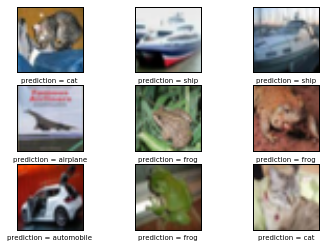

In [19]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    image = X_test[i]
    image = np.transpose(image, (1,2,0))
    plt.imshow(image ,interpolation='bilinear')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.xlabel("prediction = %s" % labels[int(y_test[i])], fontsize=7)
    

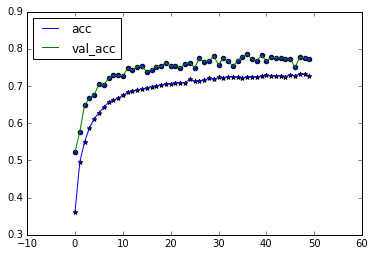

In [20]:
# plot the result
plt.figure
plt.plot(result.epoch,result.history['acc'],label="acc")
plt.plot(result.epoch,result.history['val_acc'],label="val_acc")
plt.scatter(result.epoch,result.history['acc'],marker='*')
plt.scatter(result.epoch,result.history['val_acc'])
plt.legend(loc='upper left')
plt.show()

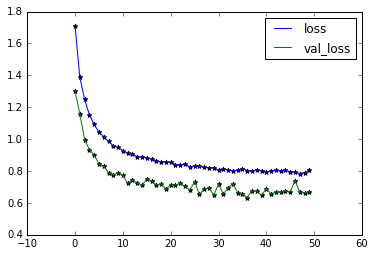

In [21]:
plt.figure
plt.plot(result.epoch,result.history['loss'],label="loss")
plt.plot(result.epoch,result.history['val_loss'],label="val_loss")
plt.scatter(result.epoch,result.history['loss'],marker='*')
plt.scatter(result.epoch,result.history['val_loss'],marker='*')
plt.legend(loc='upper right')
plt.show()